**AUTOENCODERS ON CIFAR10**

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
!pip install livelossplot
from livelossplot import PlotLossesKeras

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
x_train_gray = x_train[:,:,:,0]
x_test_gray = x_test[:,:,:,0]

In [4]:
print('Training Shape:', x_train_gray.shape)
print('Number of train samples:', x_train_gray.shape[0])
print('Number of test samples:', x_test_gray.shape[0])
x_val = x_test_gray[:7000]
x_test = x_test_gray[7000:]
print("Validation Data Shape: {0} \nTest Data Shape: {1}".format(x_val.shape, x_test.shape))

Training Shape: (50000, 32, 32)
Number of train samples: 50000
Number of test samples: 10000
Validation Data Shape: (7000, 32, 32) 
Test Data Shape: (3000, 32, 32)


In [5]:
input_img = Input(shape=(32, 32))

#Encoding
x = Dense(64, activation = 'relu')(input_img)
x = Dense(32, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)
encoded = Dense(8, activation = 'relu')(x)

# Decoding
x = Dense(8, activation = 'relu')(encoded)
x = Dense(16, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
decoded = Dense(32, activation = 'sigmoid')(x)

In [6]:
model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
print('Training Shape:', x_train_gray.shape)
print("Validation Shape: ",(x_val.shape, x_test.shape))
print('Testing Shape:', x_test.shape)

Training Shape: (50000, 32, 32)
Validation Shape:  ((7000, 32, 32), (3000, 32, 32))
Testing Shape: (3000, 32, 32)


In [8]:
batch_size = 32
num_classes = 10
epochs = 10
chkpt = 'AutoEncoder_Cifar10_Deep_weights.hdf5'
mc = ModelCheckpoint(filepath = chkpt, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

history = model.fit(x_train_gray, x_train_gray, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_val, x_val), 
                    callbacks = [mc])

Epoch 1/10
1556/1563 [============================>.] - ETA: 0s - loss: 0.5951
Epoch 00001: val_loss improved from inf to 0.58600, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5951 - val_loss: 0.5860
Epoch 2/10
1556/1563 [============================>.] - ETA: 0s - loss: 0.5825
Epoch 00002: val_loss improved from 0.58600 to 0.57970, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5825 - val_loss: 0.5797
Epoch 3/10
1556/1563 [============================>.] - ETA: 0s - loss: 0.5787
Epoch 00003: val_loss improved from 0.57970 to 0.57925, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5787 - val_loss: 0.5793
Epoch 4/10
1560/1563 [============================>.] - ETA: 0s - loss: 0.5784
Epoch 00004: val_loss improved from 0.57925 to 0.57898, saving model to AutoEncoder_C

In [9]:

score = model.evaluate(x_test, x_test, verbose=1)
print(score)

94/94 [==============================] - 0s 2ms/step - loss: 0.5728
0.5728088021278381


In [10]:
c10test = model.predict(x_test)
c10val = model.predict(x_val)
print("Validation Dataset Score: {0}\nTest Dataset Score: {1}".format(np.average(c10val), np.average(c10test)))

Validation Dataset Score: 0.49898436665534973
Test Dataset Score: 0.49395817518234253


In [11]:
def showImage(orig, dec, num=10):
  n = num 
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(orig[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(dec[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

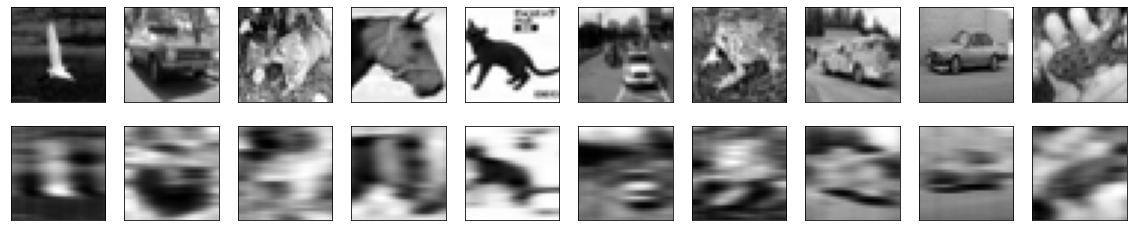

In [12]:
showImage(x_test, c10test)

**Clustering on Airqualityindex. To Identify best clustering technique on the dataset.**

In [1]:
# Importing the Data
!wget -O AirQualityUCI.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip AirQualityUCI.zip

--2020-10-30 14:20:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1.47M  4.24MB/s    in 0.3s    

2020-10-30 14:20:31 (4.24 MB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('/content/AirQualityUCI.xlsx', parse_dates=[['Date', 'Time']])

In [5]:
df.drop(columns=('Date_Time'),inplace=True)

In [6]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [7]:
from sklearn.cluster import KMeans

In [8]:
kmean=KMeans(n_clusters=3)
kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
kmean.labels_

array([0, 1, 1, ..., 0, 1, 1], dtype=int32)

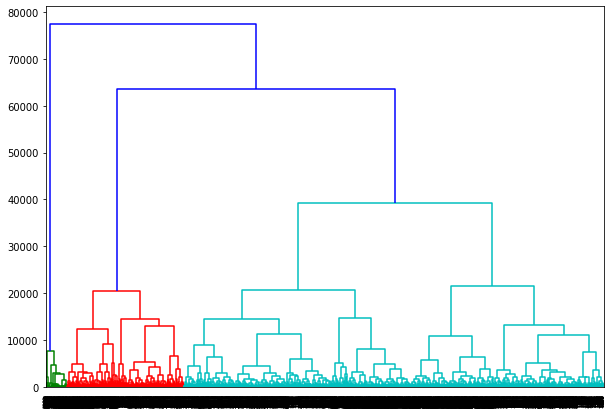

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(df, 'ward')

labelList = range(1, 46)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending')
plt.show()

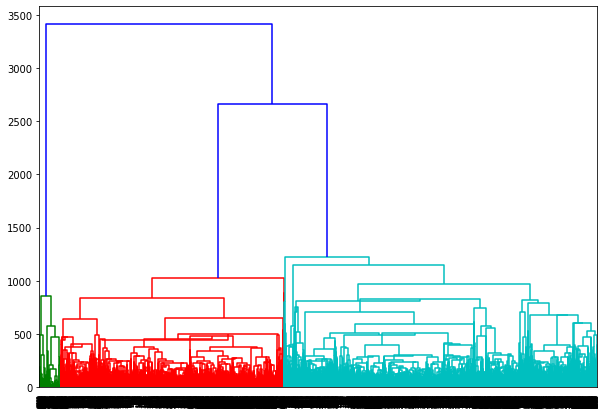

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(df, 'median')

labelList = range(1, 46)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending')
plt.show()

In [ ]:
#k-means++

Cluster 1 Inertia 6806439310.153997
Cluster 2 Inertia 4023558678.6373286
Cluster 3 Inertia 2404570654.244895
Cluster 4 Inertia 1774328788.995475
Cluster 5 Inertia 1528504955.9190588
Cluster 6 Inertia 1321961543.9370325
Cluster 7 Inertia 1165742870.479892
Cluster 8 Inertia 1048768683.399089
Cluster 9 Inertia 957441832.4536798
Cluster 10 Inertia 883552801.7241546
Cluster 11 Inertia 826758800.6599476
Cluster 12 Inertia 783316707.8154602
Cluster 13 Inertia 745311960.8584425
Cluster 14 Inertia 717482227.8346338
Cluster 15 Inertia 689659608.3227266
Cluster 16 Inertia 661979766.2334627
Cluster 17 Inertia 642720224.9020729
Cluster 18 Inertia 623127268.8847177
Cluster 19 Inertia 601992661.5746614


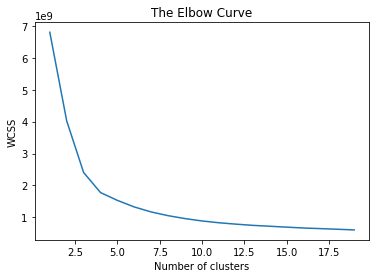

In [31]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(df)
 wcss.append(kmeans.inertia_)
 print('Cluster', i,'Inertia', kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

In [ ]:
# random

Cluster 1 Inertia 6806439310.153997
Cluster 2 Inertia 4023556573.079323
Cluster 3 Inertia 2404570654.244895
Cluster 4 Inertia 1774342054.9028428
Cluster 5 Inertia 1528464498.3772788
Cluster 6 Inertia 1321967017.27821
Cluster 7 Inertia 1165742870.479892
Cluster 8 Inertia 1049176279.3158113
Cluster 9 Inertia 957559572.5732071
Cluster 10 Inertia 883855039.3496326
Cluster 11 Inertia 826759375.6491349
Cluster 12 Inertia 783316707.8154602
Cluster 13 Inertia 745528423.6859081
Cluster 14 Inertia 717110324.6568353
Cluster 15 Inertia 689539299.7586392
Cluster 16 Inertia 671615286.054127
Cluster 17 Inertia 650947930.4989234
Cluster 18 Inertia 636936958.0093892
Cluster 19 Inertia 620886556.2213027


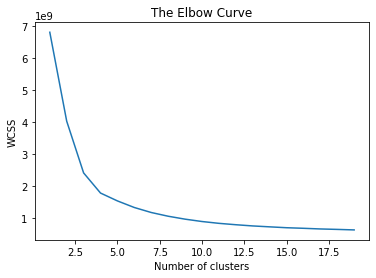

In [34]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='random',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(df)
 wcss.append(kmeans.inertia_)
 print('Cluster', i,'Inertia', kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

In [39]:
from sklearn.cluster import Birch

In [46]:
bclust=Birch(branching_factor=100, threshold=.5).fit(df)
print(bclust)
Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=3,
   threshold=0.5)  

Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)


Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)

In [47]:
labels = bclust.predict(df)

In [49]:
labels

array([0, 0, 0, ..., 0, 0, 0])

**Meanshift Clustering**

In [54]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [56]:
bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df)

MeanShift(bandwidth=590.0906066390463, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [59]:
cluster_centers = ms.cluster_centers_
labels = ms.labels_


In [58]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3
